In [100]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from cobra.io import read_sbml_model
from matplotlib import pyplot as plt

model = read_sbml_model('Sco-GEM.xml')
medium=model.medium

In [101]:
fseof = FSEOF(model)

In [102]:
# Here we use the FSEOF algorithm to identify the reactions affected by varied undecylprodigiosin flux:
sol=fseof.run(target=model.reactions.get_by_id("REDS37"))
df=sol.data_frame
#PRODSYN

In [16]:
#There are 154 reaction fluxes affected as visualized below. we will try to extract the most obvious candidates.

In [103]:
df

,1,2,3,4,5,6,7,8,9,10
3HAD100,0.014384,0.026048,0.037711,0.049372,0.061034,0.072695,0.084357,0.096019,0.107680,0.119342
3HAD120,0.013911,0.025621,0.037331,0.049039,0.060747,0.072456,0.084164,0.095873,0.107581,0.119290
3HAD60,0.014387,0.026051,0.037713,0.049374,0.061036,0.072697,0.084358,0.096019,0.107681,0.119342
3HAD80,0.014387,0.026051,0.037713,0.049374,0.061036,0.072697,0.084358,0.096019,0.107681,0.119342
3HBCOAHL,0.000000,0.000000,0.010466,0.025487,0.040507,0.055528,0.070548,0.085569,0.100589,0.115610
...,...,...,...,...,...,...,...,...,...,...
TYRL,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000000,0.000000,0.000000
VOR2b,-0.007905,-0.020204,-0.021303,-0.018677,-0.016050,-0.013424,-0.010797,-0.008171,-0.005545,-0.002918
GLCpts,0.793629,0.794253,0.794882,0.795513,0.796144,0.796775,0.797406,0.798037,0.798668,0.799299
MOBDabc,0.000003,0.000002,0.000002,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000000


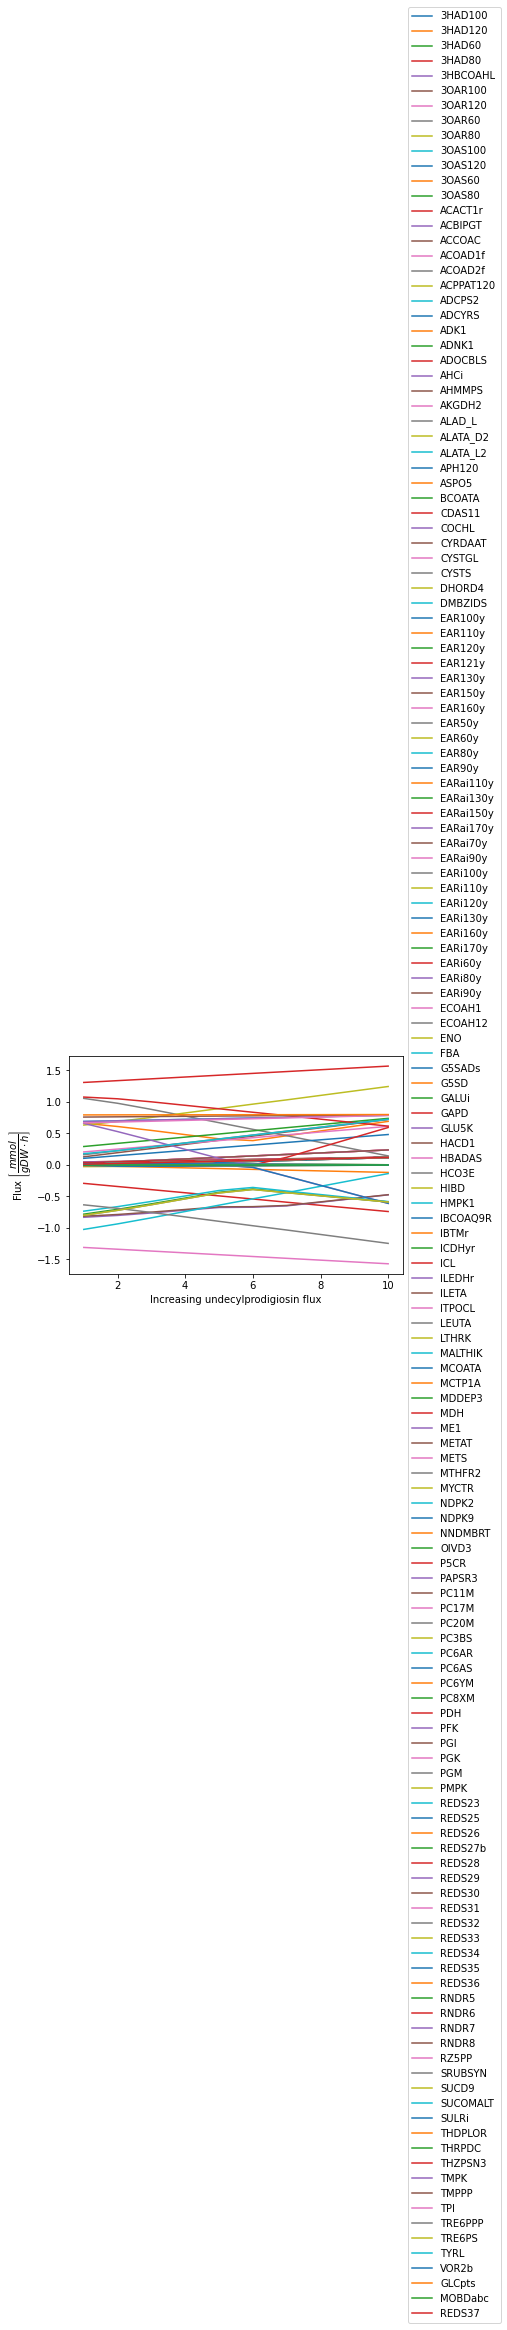

In [14]:
sol.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Increasing undecylprodigiosin flux");
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$");

In [108]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)

# remove all the ones that have a flux change of 0.0 
from pytest import approx
# removing genes from dataframe 
removed_zero = (df[1] != 0)
df = df.loc[removed_zero]
df

,1,2,3,4,5,6,7,8,9,10
GAPD,1.308776,1.337295,1.366049,1.394892,1.423736,1.452579,1.481423,1.510266,1.539110,1.567953
PDH,1.076735,1.049351,1.001099,0.945980,0.890862,0.835744,0.781864,0.726444,0.671025,0.615605
ALAD_L,1.055794,0.978169,0.881128,0.775557,0.669986,0.564415,0.463800,0.357024,0.250247,0.143471
GLCpts,0.793629,0.794253,0.794882,0.795513,0.796144,0.796775,0.797406,0.798037,0.798668,0.799299
PGI,0.759429,0.763402,0.767408,0.771426,0.775444,0.779462,0.783481,0.787499,0.791517,0.795535
...,...,...,...,...,...,...,...,...,...,...
TRE6PS,-0.798092,-0.719841,-0.631068,-0.537719,-0.444371,-0.389710,-0.440479,-0.489709,-0.538938,-0.588168
ILETA,-0.813559,-0.785991,-0.748513,-0.706694,-0.664874,-0.661743,-0.642874,-0.586061,-0.529249,-0.472436
ILEDHr,-0.830435,-0.801214,-0.762070,-0.718579,-0.675088,-0.670285,-0.649745,-0.591261,-0.532777,-0.474293
MALTHIK,-1.022690,-0.935234,-0.838845,-0.738487,-0.638129,-0.537771,-0.439891,-0.338931,-0.237970,-0.137010


In [98]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1

In [99]:
#If we look at the reactions that have a higher relative_change_in_flux than 80% we can find target rections.
target_reactions_df = df[df['relative_change_in_flux'] > 1.88]
df= df.sort_values(['relative_change_in_flux'], ascending = False)
df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
IBTMr,-0.010301,-0.022365,-0.033694,-0.045851,-0.058008,-0.070165,-0.082321,-0.094478,-0.106635,-0.118792,1.913285
REDS37,0.011907,0.023814,0.035721,0.047628,0.059535,0.071441,0.083348,0.095255,0.107162,0.119069,1.900000
REDS28,0.011907,0.023814,0.035721,0.047628,0.059535,0.071441,0.083348,0.095255,0.107162,0.119069,1.899999
SRUBSYN,0.011907,0.023814,0.035721,0.047628,0.059535,0.071441,0.083348,0.095255,0.107162,0.119069,1.899999
REDS30,0.011907,0.023814,0.035721,0.047628,0.059535,0.071441,0.083348,0.095255,0.107162,0.119069,1.899999
...,...,...,...,...,...,...,...,...,...,...,...
PC6YM,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
COCHL,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
PC6AR,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
PC11M,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf


Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

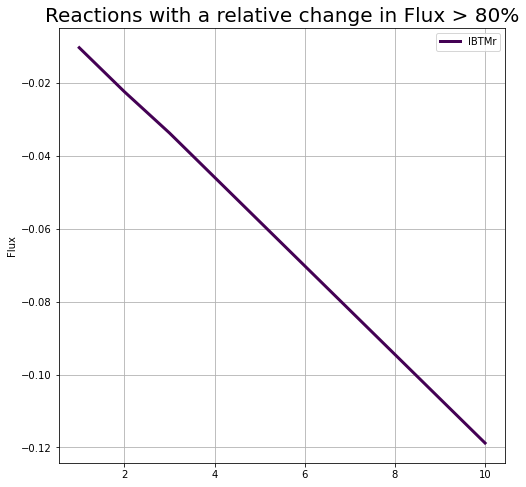

In [65]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [180]:
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
CYSTGL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002477,0.001875,0.001272,0.000670,2.000000
ASPO5,0.000000,0.000000,0.000736,0.000645,0.000554,0.000464,0.000373,0.000282,0.000191,0.000101,2.000000
HIBD,0.000000,0.000000,0.010466,0.025487,0.040507,0.055528,0.070548,0.085569,0.100589,0.115610,2.000000
IBCOAQ9R,0.000000,0.000000,0.010466,0.025487,0.040507,0.055528,0.070548,0.085569,0.100589,0.115610,2.000000
IBTMr,-0.010301,-0.022365,-0.033694,-0.045851,-0.058008,-0.070165,-0.082321,-0.094478,-0.106635,-0.118792,1.913285


In [181]:
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
ACCOAC,0.128599,0.194443,0.260241,0.326022,0.391802,0.457583,0.523363,0.589143,0.654924,0.720704,1.821565
ACACT1r,0.024688,0.048416,0.071407,0.095225,0.119043,0.142861,0.166679,0.190497,0.214315,0.238134,1.896327
ECOAH1,0.024688,0.048416,0.071407,0.095225,0.119043,0.142861,0.166679,0.190497,0.214315,0.238134,1.896327
HACD1,0.024688,0.048416,0.071407,0.095225,0.119043,0.142861,0.166679,0.190497,0.214315,0.238134,1.896327
ACOAD1f,0.024688,0.048416,0.071407,0.095225,0.119043,0.142861,0.166679,0.190497,0.214315,0.238134,1.896327
